# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

# Cleansing The Data

In [2]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.drop(['PassengerId','Name', 'Ticket','Cabin','Embarked', 'Fare'],axis=1, inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [8]:
df['Age'].mean()

29.69911764705882

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

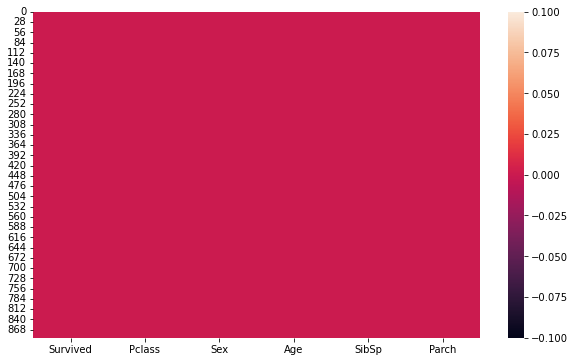

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

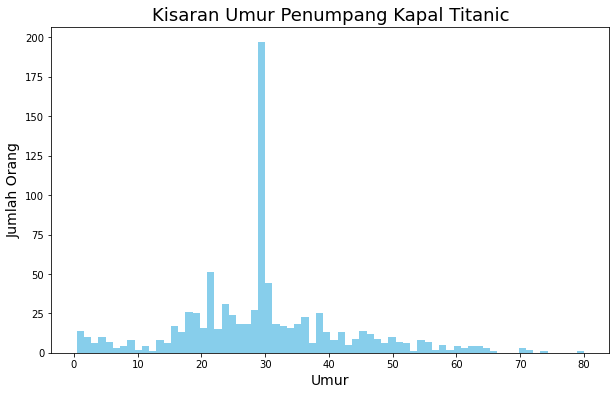

In [11]:
plt.figure(figsize=(10,6))
plt.hist(x=df['Age'], color='skyblue', bins=70)
plt.title('Kisaran Umur Penumpang Kapal Titanic', fontsize=18)
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Jumlah Orang', fontsize=14)
plt.show()

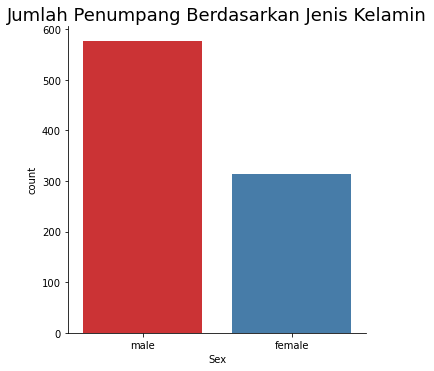

In [12]:
sns.catplot(x='Sex',kind='count',data=df,palette='Set1')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin', fontsize=18)
plt.show()

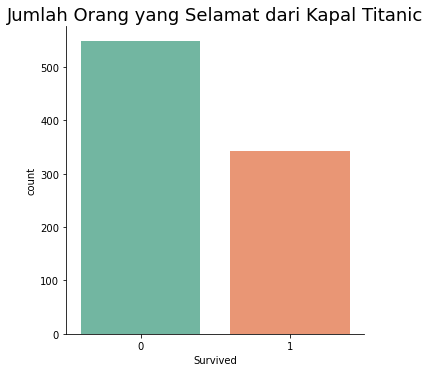

In [13]:
sns.catplot(x='Survived',kind='count',data=df,palette='Set2')
plt.title('Jumlah Orang yang Selamat dari Kapal Titanic', fontsize=18)
plt.show()

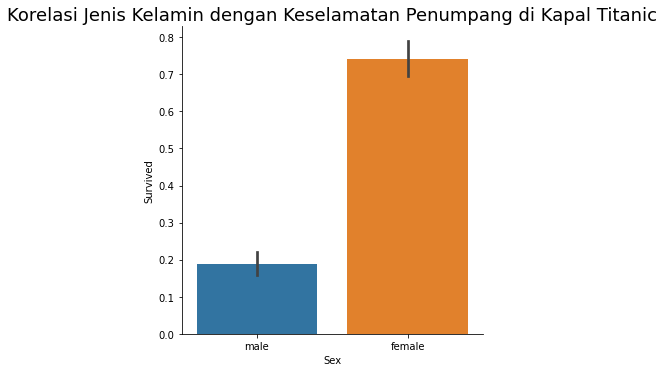

In [14]:
sns.catplot(x='Sex',y='Survived',kind='bar',data=df)
plt.title('Korelasi Jenis Kelamin dengan Keselamatan Penumpang di Kapal Titanic', fontsize=18)
plt.show()

# Preprocessing + Split the Data

In [15]:
dt = pd.get_dummies(df['Sex'])
dt.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [17]:
df_final = pd.concat([df,dt],axis=1)

In [18]:
df_final.drop(['Sex'],axis=1,inplace=True)
df_final.head()

,Survived,Pclass,Age,SibSp,Parch,female,male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [19]:
df_final['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
X = df_final.drop(['Survived'],axis=1)
y = df_final['Survived']

In [21]:
scaler = StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)

In [22]:
X_new

array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.73769513,
         0.73769513],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  1.35557354,
        -1.35557354],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361,  1.35557354,
        -1.35557354],
       ...,
       [ 0.82737724,  0.        ,  0.43279337,  2.00893337,  1.35557354,
        -1.35557354],
       [-1.56610693, -0.2846632 , -0.4745452 , -0.47367361, -0.73769513,
         0.73769513],
       [ 0.82737724,  0.17706291, -0.4745452 , -0.47367361, -0.73769513,
         0.73769513]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.80, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

# Modelling

In [24]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = model.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



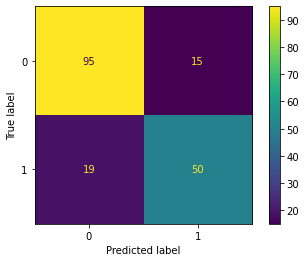

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()